<a href="https://colab.research.google.com/github/HalisManaz/Concrete-Compressive-Strength-Prediction-With-AI/blob/main/Concrete_Compressive_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concrete Compressive Strength ML Model

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


## Importing Dataset

In [ ]:
dataset = pd.read_excel('Concrete_Data.xls')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
X

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [ ]:
y

array([79.98611076, 61.88736576, 40.26953526, ..., 23.69660064,
       32.76803638, 32.40123514])

## Spliting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

## Correlation Matrix

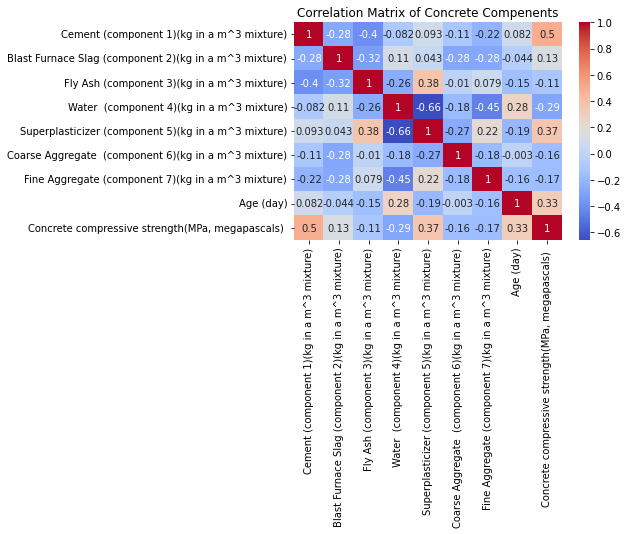

In [ ]:
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Concrete Compenents")
plt.show()

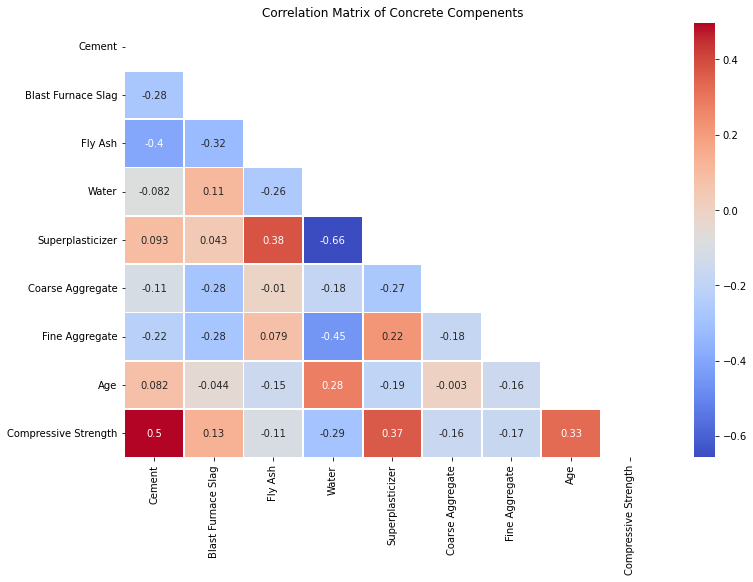

In [ ]:
# Simple version of correlation matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.title("Correlation Matrix of Concrete Compenents")
components = ["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer", "Coarse Aggregate", "Fine Aggregate", "Age", "Compressive Strength"]
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.75, mask = mask, xticklabels= components, yticklabels= components)
plt.gcf().set_size_inches(12, 8)
plt.show()

In [ ]:
# Highest three correlation
correlations = corr.unstack().sort_values(ascending = False)
correlations[correlations != 1].sort_values(ascending = False)[1:7:2]

Cement (component 1)(kg in a m^3 mixture)            Concrete compressive strength(MPa, megapascals)     0.497833
Superplasticizer (component 5)(kg in a m^3 mixture)  Fly Ash (component 3)(kg in a m^3 mixture)          0.377340
                                                     Concrete compressive strength(MPa, megapascals)     0.366102
dtype: float64

In [ ]:
px.scatter_3d(dataset, x=dataset.columns[0], y=dataset.columns[4], z=dataset.columns[2], color = dataset.columns[-1], color_continuous_scale= 'rainbow',
              labels = {
                  dataset.columns[0] : "Cement",
                  dataset.columns[4] : "Superplasticizer",
                  dataset.columns[2] : "Flyash",
                  dataset.columns[-1] : "Compressive Strength"
              })

In [ ]:
#  Lowest three correlation
correlations[correlations != 1].sort_values(ascending = True)[1:7:2]

Superplasticizer (component 5)(kg in a m^3 mixture)  Water  (component 4)(kg in a m^3 mixture)           -0.657464
Water  (component 4)(kg in a m^3 mixture)            Fine Aggregate (component 7)(kg in a m^3 mixture)   -0.450635
Cement (component 1)(kg in a m^3 mixture)            Fly Ash (component 3)(kg in a m^3 mixture)          -0.397475
dtype: float64

## Training Models

In [ ]:
# Create dataframe for comparison models
models_comparison = pd.DataFrame(columns=["Model Name", "Mean Squared Error", "Mean Absolute Error", "R2 Score"])
models_comparison

,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score


### Linear Regression

In [ ]:
  from sklearn.linear_model import LinearRegression
  linear_regressor = LinearRegression()
  linear_regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = linear_regressor.predict(X_test)
metrics = {"Model Name" : "Linear Regression",
           "Mean Squared Error" : mean_squared_error(y_test, y_pred),
           "Mean Absolute Error" : mean_absolute_error(y_test, y_pred),
           "R2 Score" : r2_score(y_test, y_pred),
           }
models_comparison = models_comparison.append(metrics, ignore_index=True)
models_comparison

,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score
0,Linear Regression,105.547731,8.136907,0.613035


## Support Vector Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X_train)
sc_y = StandardScaler()
y = sc_y.fit_transform(np.reshape(y_train, (-1, 1)))

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()

In [ ]:
y_pred = sc_y.inverse_transform(regressor.predict((sc_X.transform(X_test))).reshape(-1,1))
metrics = {"Model Name" : "Support Vector Regression",
           "Mean Squared Error" : mean_squared_error(y_test, y_pred),
           "Mean Absolute Error" : mean_absolute_error(y_test, y_pred),
           "R2 Score" : r2_score(y_test, y_pred),
           }
models_comparison = models_comparison.append(metrics, ignore_index=True)
models_comparison

,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score
0,Linear Regression,105.54800,8.137000,0.613000
1,Decision Tree Regression,45.26000,4.599000,0.834000
2,Random Forest Regression,30.94800,3.792000,0.887000
3,XGBoost Regression,26.62600,3.729000,0.902000
4,LGM Regression,18.21100,2.929000,0.933000
5,CatBoost Regression,20.74400,2.890000,0.924000
6,Support Vector Regression,50336.43843,223.769561,-183.546048


## Decision Tree Regression



In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state= 0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
metrics = {"Model Name" : "Decision Tree Regression",
           "Mean Squared Error" : mean_squared_error(y_test, y_pred),
           "Mean Absolute Error" : mean_absolute_error(y_test, y_pred),
           "R2 Score" : r2_score(y_test, y_pred),
           }
models_comparison = models_comparison.append(metrics, ignore_index=True)
models_comparison

,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score
0,Linear Regression,105.548000,8.137000,0.613000
1,Decision Tree Regression,45.259851,4.598846,0.834066


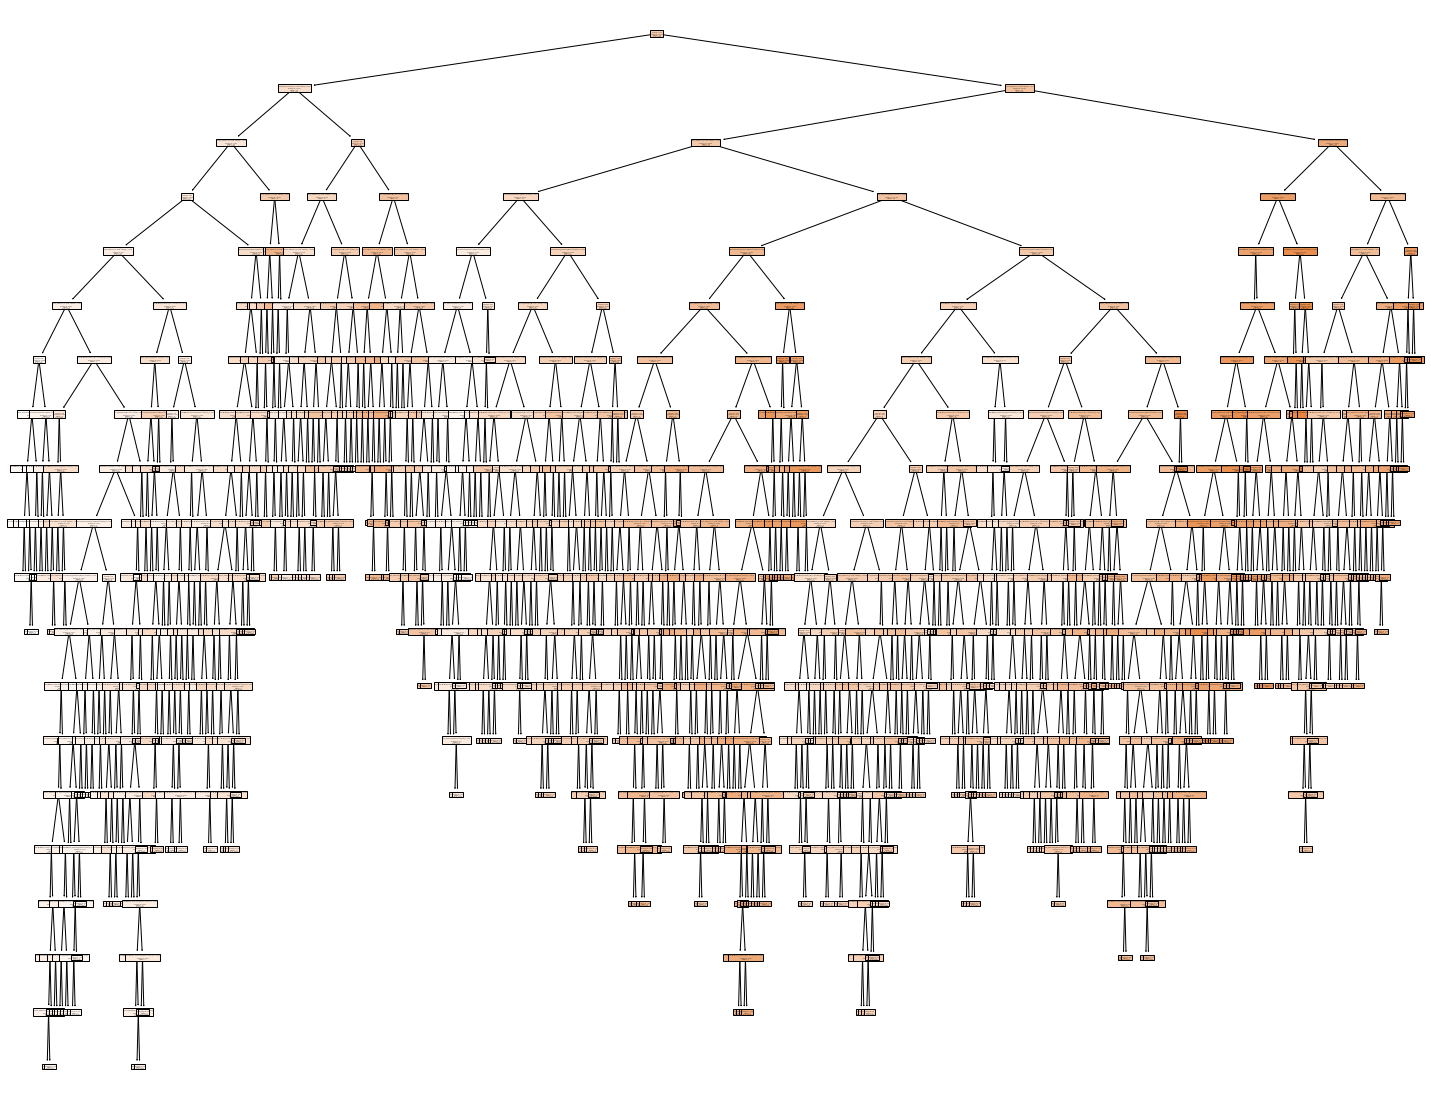

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, 
                   feature_names=dataset.columns[:-1],  
                   class_names=dataset.columns[:-1],
                   filled=True)

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 10, random_state= 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
metrics = {"Model Name" : "Random Forest Regression",
           "Mean Squared Error" : mean_squared_error(y_test, y_pred),
           "Mean Absolute Error" : mean_absolute_error(y_test, y_pred),
           "R2 Score" : r2_score(y_test, y_pred),
           }
models_comparison = models_comparison.append(metrics, ignore_index=True)
models_comparison

,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score
0,Linear Regression,105.548000,8.137000,0.613000
1,Decision Tree Regression,45.259851,4.598846,0.834066
2,Random Forest Regression,30.947568,3.792198,0.886538


## XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

[17:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
metrics = {"Model Name" : "XGBoost Regression",
           "Mean Squared Error" : mean_squared_error(y_test, y_pred),
           "Mean Absolute Error" : mean_absolute_error(y_test, y_pred),
           "R2 Score" : r2_score(y_test, y_pred),
           }
models_comparison = models_comparison.append(metrics, ignore_index=True)
models_comparison

,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score
0,Linear Regression,105.548000,8.137000,0.613000
1,Decision Tree Regression,45.259851,4.598846,0.834066
2,Random Forest Regression,30.947568,3.792198,0.886538
3,XGBoost Regression,26.626268,3.729164,0.902381


## LightGMB Regressor

In [ ]:
import lightgbm
regressor = lightgbm.LGBMRegressor()
regressor.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
y_pred = regressor.predict(X_test)
metrics = {"Model Name" : "LGM Regression",
           "Mean Squared Error" : mean_squared_error(y_test, y_pred),
           "Mean Absolute Error" : mean_absolute_error(y_test, y_pred),
           "R2 Score" : r2_score(y_test, y_pred),
           }
models_comparison = models_comparison.append(metrics, ignore_index=True)
models_comparison

,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score
0,Linear Regression,105.548000,8.137000,0.613000
1,Decision Tree Regression,45.259851,4.598846,0.834066
2,Random Forest Regression,30.947568,3.792198,0.886538
3,XGBoost Regression,26.626268,3.729164,0.902381
4,LGM Regression,18.211440,2.929360,0.933232


## CatBoost Regressor

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
metrics = {"Model Name" : "CatBoost Regression",
           "Mean Squared Error" : mean_squared_error(y_test, y_pred),
           "Mean Absolute Error" : mean_absolute_error(y_test, y_pred),
           "R2 Score" : r2_score(y_test, y_pred),
           }
models_comparison = models_comparison.append(metrics, ignore_index=True)


In [ ]:
models_comparison = models_comparison.round(3)
models_comparison.sort_values(by = ['Mean Squared Error'])
# Winner is LGM Regression

,Model Name,Mean Squared Error,Mean Absolute Error,R2 Score
4,LGM Regression,18.211,2.929,0.933
5,CatBoost Regression,20.744,2.890,0.924
3,XGBoost Regression,26.626,3.729,0.902
2,Random Forest Regression,30.948,3.792,0.887
1,Decision Tree Regression,45.260,4.599,0.834
0,Linear Regression,105.548,8.137,0.613


## Results

In [ ]:
regressor = lightgbm.LGBMRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
results = pd.DataFrame(columns=["Experiment Results", "Predictions"])
results["Experiment Results"] = y_test
results["Predictions"] = y_pred

In [ ]:
pd.set_option('display.max_rows', None)
results

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

results_rnd20 = results.sample(n=20)
data1 = go.Bar(x=[i for i in range(1, len(results_rnd20)+1)],
                y=results_rnd20["Experiment Results"],
                name='Experiment Result')
data2 = go.Bar(x=[i for i in range(1, len(results_rnd20)+1)],
                y=results_rnd20["Predictions"],
                name='Prediction')

data = [data1, data2]
layout = go.Layout(barmode='group',
                   legend={'traceorder':'normal'},
                   title='Experiement Results vs Prediction Results (Random 20 Sample)',
                   title_x=0.5,
                    xaxis_tickfont_size=14,
                    yaxis=dict(
                        title='Compressive Strength (MPa)',
                        titlefont_size=16,
                        tickfont_size=14,))

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Experiement Results vs Prediction Results')